In [0]:
import re
import matplotlib.pyplot as plt
import numpy as np
import sys

**DAILY, HOURLY AND MINUTE BY MINUTE ANALYSIS. COUNTRY AND ISP ANALYSIS.**


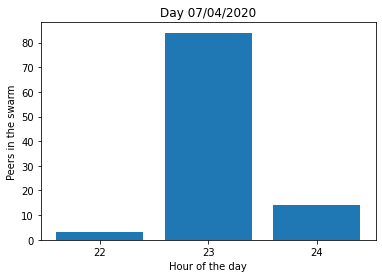

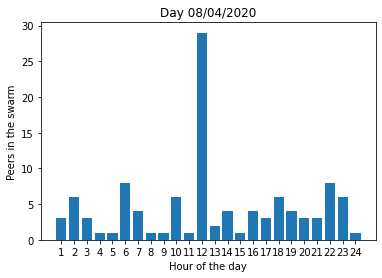

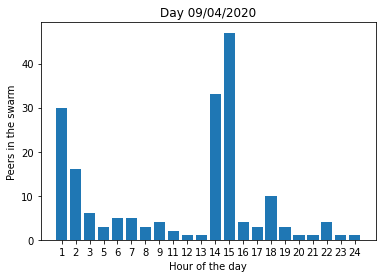

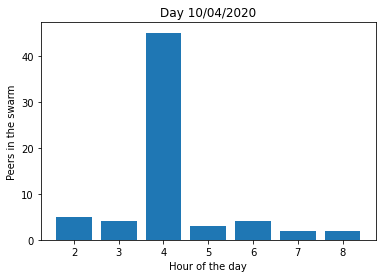

Giorno e ora con max numero peer: 07/04/2020 23 84
Giorno e ora con min numero peer: 08/04/2020 4 1
Avg numero peer: 8.196428571428571


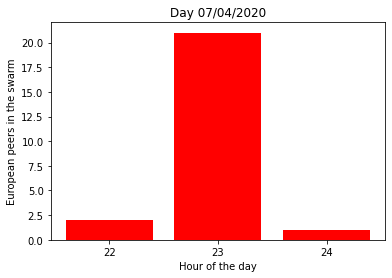

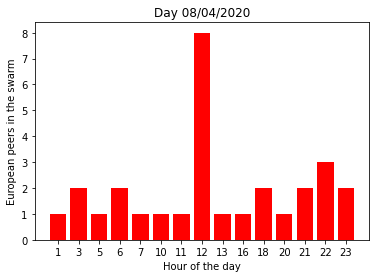

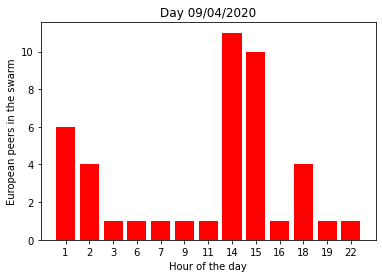

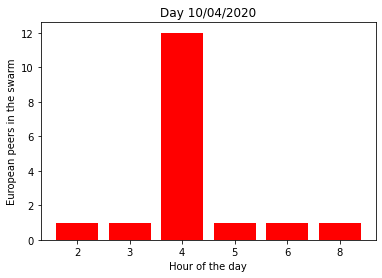

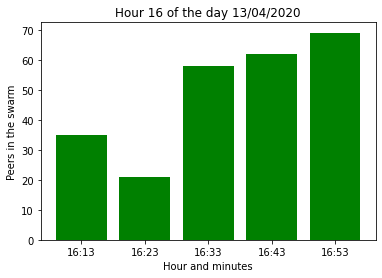

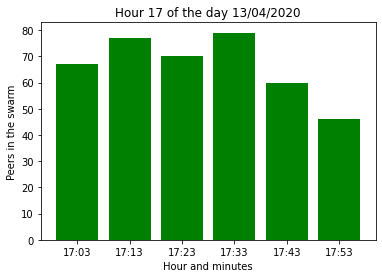

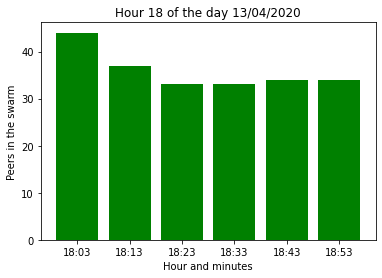

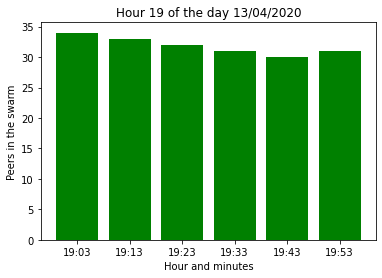

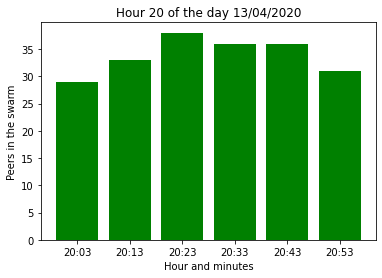

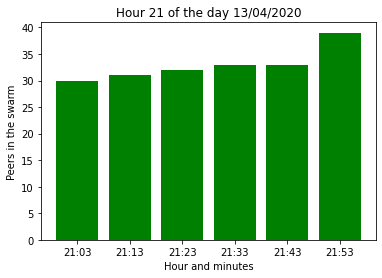

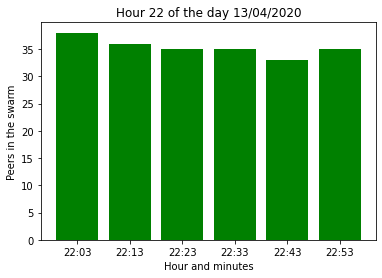

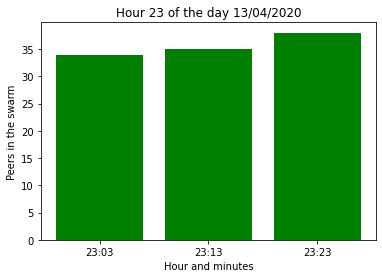

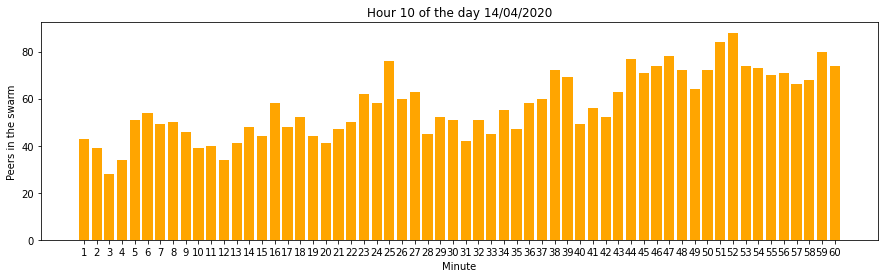

Numero di peer unici in 59 ore: 463


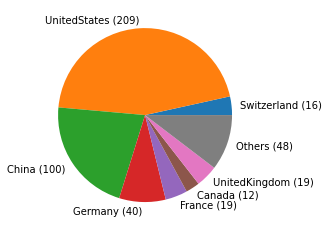

Others ['Singapore', 'Netherlands', 'RussianFederation', 'Japan', 'India', 'IPAddressnotfound', 'Poland', 'Spain', 'Austria', 'Finland', 'CostaRica', 'Taiwan', 'Greece', 'Lithuania', 'SouthAfrica', 'Sweden', 'Malaysia', 'CzechRepublic', 'Australia']
DigitalOcean,LLC (44)
PACKET (10)
ShenzhenTencentComputerSystemsCompanyLimited (58)
Chinanet (21)
HetznerOnlineGmbH (14)
Linode,LLC (9)
Choopa,LLC (6)
ContaboGmbH (8)
Amazon.com,Inc. (14)
Choopa (44)
GoogleLLC (75)
OVHSAS (13)
AmazonTechnologiesInc. (17)
Others (130)


In [11]:
swarmFile = 'out_swarm_peers.txt'
swarmHourFile = 'out_swarm_hour.txt'
swarmMinFile = 'out_swarm_min.txt'
europeanCountries = ['Switzerland', 'Netherlands', 
                     'Germany', 'France', 'UnitedKingdom', 'Poland', 'Spain', 'Austria', 'Finland',
                     'Greece', 'Lithuania', 'Sweden', 'CzechRepublic']
                     
swarm = open(swarmFile, "r")
swarmHour = open(swarmHourFile, 'r')
swarmMin = open(swarmMinFile, 'r')

swarmDict = {}
#mappatura peer-nazione
peerDict = {}
europeanSwarmDict = {}
ispDict = {}

def processLine(inputLine, flag):
  splitLine = inputLine.split(" ")
  date = splitLine[0]
  peerId = splitLine[2]
  if flag == 0:
    hour = str(int((splitLine[1].split(":"))[0]) + 1) #è alle x:51, lo porto all'ora successiva
    country = re.sub("[^a-zA-Z]+", "",splitLine[6])
    isp = (splitLine[7]).rstrip("\n")
    for i in range(8, len(splitLine)):
      isp = isp + splitLine[i].rstrip("\n")
  else:
    hour = str(splitLine[1])
    country = ""
    isp = ""
  return (date, hour, country, peerId, isp)


for line in swarm:
  if "cantresolvehostname" in line:
    continue

  #processing of the file
  date, hour, country, peerId, isp = processLine(line, 0)

  #adding the peer to the peer-country dictionary and its isp to the unique isp dictionary
  if peerId in peerDict:
    continue
  else:
    peerDict[peerId] = country
    if isp in ispDict:
      ispDict[isp] += 1
    else:
      ispDict[isp] = 1

  #adding the peer to those in the swarm in a determinate date and time
  if date in swarmDict:
    if hour in swarmDict[date]:
      swarmDict[date][hour] = swarmDict[date][hour] + 1
    else:
     swarmDict[date][hour] = 1 
  else:
    swarmDict[date] = {}

  #adding the peer to the european ones in the swarm in a determinate date and time
  if country in europeanCountries:
    if date in europeanSwarmDict:
      if hour in europeanSwarmDict[date]:
        europeanSwarmDict[date][hour] = europeanSwarmDict[date][hour] + 1
      else:
        europeanSwarmDict[date][hour] = 1 
    else:
      europeanSwarmDict[date] = {}

swarm.close

#daily bar plots
minNumPeers = sys.maxsize
maxNumPeers = 0
maxDayHour = ""
minDayHour = ""
numHours = 0
totalPeers = 0
for keyDate in swarmDict:
  hourLabels = list()
  hourPeers = list()
  for keyHour in swarmDict[keyDate]:
    numPeers = swarmDict[keyDate][keyHour]
    if(numPeers > maxNumPeers):
      maxNumPeers = numPeers
      maxDayHour = keyDate + " " + keyHour
    #numPeers = 3 when ipfs daemon had just started, so it's not a meaningful number of peers
    if(numPeers != 3 and numPeers < minNumPeers):
      minNumPeers = numPeers
      minDayHour = keyDate + " " + keyHour
    totalPeers = totalPeers + numPeers
    numHours = numHours + 1
    hourLabels.append(keyHour)
    hourPeers.append(swarmDict[keyDate][keyHour])
  plt.bar(hourLabels, hourPeers)
  plt.title('Day ' + str(keyDate))
  plt.xlabel('Hour of the day')
  plt.ylabel('Peers in the swarm')
  plt.show()

avgPeers = totalPeers / numHours
print("Giorno e ora con max numero peer: " + maxDayHour + " " + str(maxNumPeers))
print("Giorno e ora con min numero peer: " + minDayHour + " " + str(minNumPeers))
print("Avg numero peer: " + str(avgPeers))

#daily bar plots for european peers
for keyDate in europeanSwarmDict:
  hourLabels = list()
  hourPeers = list()
  for keyHour in europeanSwarmDict[keyDate]:
    hourLabels.append(keyHour)
    hourPeers.append(europeanSwarmDict[keyDate][keyHour])
  plt.bar(hourLabels, hourPeers, color='red')
  plt.title('Day ' + str(keyDate))
  plt.xlabel('Hour of the day')
  plt.ylabel('European peers in the swarm')
  plt.show()


swarmHourDict = {}
hourDate = ""
for line in swarmHour:
  processedLine = processLine(line, 1)
  hourDate = str(processedLine[0])
  hour = (processedLine[1].split(':'))[0]
  hourMin = processedLine[1]
  if hour in swarmHourDict:
    if hourMin in swarmHourDict[hour]:
      swarmHourDict[hour][hourMin] = swarmHourDict[hour][hourMin] + 1
    else:
       swarmHourDict[hour][hourMin] = 1
  else:
    swarmHourDict[hour] = {}

swarmHour.close

#hourly bar plots
minNumPeers = sys.maxsize
maxNumPeers = 0
maxDayHour = ""
minDayHour = ""
numHours = 0
totalPeers = 0
for keyHour in swarmHourDict:
  hourLabels = list()
  hourPeers = list()
  for keyHourMin in swarmHourDict[keyHour]:
    numPeers = swarmHourDict[keyHour][keyHourMin]
    if(numPeers > maxNumPeers):
      maxNumPeers = numPeers
      maxDayHour = keyHourMin
    if(numPeers < minNumPeers):
      minNumPeers = numPeers
      minDayHour = keyHourMin
    totalPeers = totalPeers + numPeers
    numHours = numHours + 1
    hourLabels.append(keyHourMin)
    hourPeers.append(swarmHourDict[keyHour][keyHourMin])
  plt.bar(hourLabels, hourPeers, color='green')
  plt.title('Hour ' + str(keyHour) + " of the day " + str(hourDate))
  plt.xlabel('Hour and minutes')
  plt.ylabel('Peers in the swarm')
  plt.show()

swarmMinDict = {}
hourDate = ""
for line in swarmMin:
  processedLine = processLine(line, 1)
  date = str(processedLine[0])
  hour = (processedLine[1].split(':'))[0]
  hourMin = processedLine[1]
  if hourMin in swarmMinDict:
    swarmMinDict[hourMin] = swarmMinDict[hourMin] + 1
  else:
    swarmMinDict[hourMin] = 1

#minute by minute bar plots
minute = 1
minLabels = list()
minPeers = list()
for keyHourMin in swarmMinDict:
  #the extra minutes are not considered (I want to show only the results of 1 hour)
  if(minute > 60): 
    break
  numPeers = swarmMinDict[keyHourMin]
  minLabels.append(str(minute))
  minute = minute + 1
  minPeers.append(numPeers)
plt.figure(figsize=(15,4))
plt.bar(minLabels, minPeers, color='orange')
plt.title("Hour 10 of the day 14/04/2020")
plt.xlabel('Minute')
plt.ylabel('Peers in the swarm')
plt.show()

#number of unique peers
print("Numero di peer unici in 59 ore: " + str(len(peerDict)))


countriesDict = {}
for p in peerDict:
  peerCountry = peerDict[p]
  if peerCountry in countriesDict:
    countriesDict[peerCountry] = countriesDict[peerCountry] + 1
  else:
    countriesDict[peerCountry] = 1

countries = list()
countryFreq = list()
for c in countriesDict:
  countries.append(c)
  countryFreq.append(countriesDict[c])

totalFreq = 0
for cf in countryFreq:
  totalFreq = totalFreq + cf

#countries pie chart
countries = list()
countryFreq = list()
others = 0
#a country is put in this list if its frequency is below 2%
otherCountries = list()
freqThresh = 2.0
othersInt = 0
for c in countriesDict:
  currFreq = (countriesDict[c] / totalFreq) * 100
  if(currFreq < freqThresh):
    othersInt = othersInt + countriesDict[c]
    others = others + currFreq
    otherCountries.append(c)
  else:
    countries.append(c + " (" + str(countriesDict[c]) + ")")
    countryFreq.append(currFreq)

countries.append('Others' + " (" + str(othersInt) + ")")
countryFreq.append(others)
plt.pie(countryFreq, labels=countries)
plt.show()
print('Others ' + str(otherCountries))

#isp frequency
ispList = list()
ispFreq = list()
otherIsps = list()
otherIspFreq = 0
otherIspsPerc = 0
for isp in ispDict:
  currFreq = (ispDict[isp] / totalFreq)*100
  if(currFreq < 1):
    otherIspFreq += ispDict[isp]
    otherIspsPerc += currFreq
    otherIsps.append(isp)
  else:
    ispList.append(isp + " (" + str(ispDict[isp]) + ")")
    ispFreq.append(ispDict[isp])

ispList.append('Others' + " (" + str(otherIspFreq) + ")")
ispFreq.append(otherIspFreq)

for i in range(0, len(ispList)):
  print(ispList[i])


**RTT ANALYSIS**

Max RTT: 841.669 Min RTT: 53.544 Avg RTT: 219.52084926470596
Median RTT: 187.548


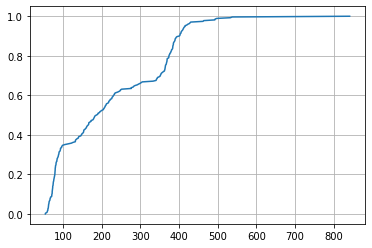

In [12]:
rtt_file = "out_ping_stats.txt"

rttRead = open(rtt_file, 'r')
maxRtt = 0
minRtt = sys.float_info.max
totalRtt = 0
rtts = list()
uniqueip = list()
for line in rttRead:
  if "=" in line:
    lineChuncks = line.split("=")
    ipAddr = (lineChuncks[0].split(" "))[0]
    if ipAddr in uniqueip:
      continue
    else:
      uniqueip.append(ipAddr)
      rtt = lineChuncks[1].split("/")
      avgRtt = float(rtt[1])
      if avgRtt > maxRtt:
        maxRtt = avgRtt
      if avgRtt < minRtt:
        minRtt = avgRtt
      totalRtt += avgRtt
      rtts.append(avgRtt)

print("Max RTT: " + str(maxRtt) + " Min RTT: " + str(minRtt) + " Avg RTT: " + str(totalRtt / len(rtts)))

#cdf for the RTTs
sortedRtts = np.sort(rtts)
medianIdx = int(len(sortedRtts) / 2)
print("Median RTT: " + str(sortedRtts[medianIdx]))
p = 1. * np.arange(len(sortedRtts))/(len(sortedRtts) - 1)
plt.grid(True)
plt.plot(sortedRtts, p)
plt.show()


**CHURN ANALYSIS**

<BarContainer object of 12 artists>

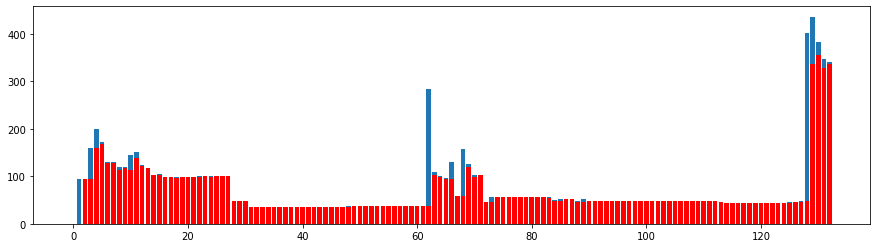

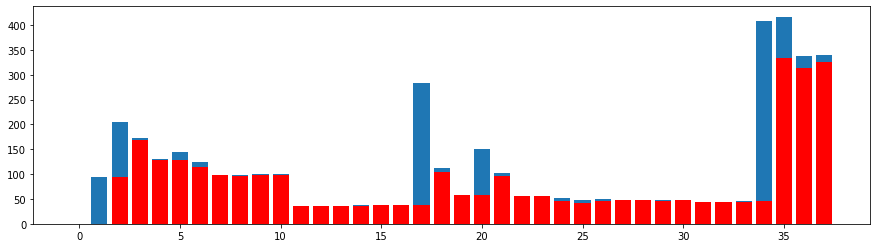

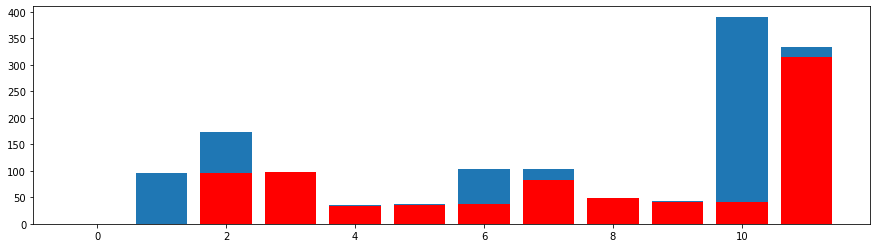

In [17]:
churn_file_10 = "dht_query_out_10.txt"
churn_file_60 = "dht_query_out_60.txt"
churn_file_300 = "dht_query_out_300.txt"

churn_10 = open(churn_file_10, 'r')
churn_60 = open(churn_file_60, 'r')
churn_300 = open(churn_file_300, 'r')

def analyzeChurnFile(fileToRead):
  prevPeers = set()
  currPeers = set()
  commonPeers = list()
  totalPeers = list()
  labels = list()
  currCounter = 0
  label = 0
  for line in fileToRead:
    if "/" in line: #line containin a new timestamp: new query
      labels.append(label)
      totalPeers.append(currCounter)
      #number of peers in common with previous query
      commonPeers.append(len(prevPeers & currPeers))
      prevPeers = currPeers
      currPeers = set()
      currCounter = 0
      label = label + 1
    else:
      p = line.rstrip("\n")
      #to avoid id repetitions
      if p in currPeers:
        continue
      else:
        currPeers.add(p)
        currCounter += 1
  return (totalPeers, commonPeers, labels)

#layered bar plots of ratio common peers with previous query / total peers
totalPeers10, commonPeers10, labels10 = analyzeChurnFile(churn_10)
churn_10.close
plt.figure(figsize=(15,4))
plt.bar(labels10,totalPeers10)
plt.bar(labels10, commonPeers10, color='red')

totalPeers60, commonPeers60, labels60 = analyzeChurnFile(churn_60)
churn_60.close
plt.figure(figsize=(15,4))
plt.bar(labels60,totalPeers60)
plt.bar(labels60, commonPeers60, color='red')

totalPeers300, commonPeers300, labels300 = analyzeChurnFile(churn_300)
churn_300.close
plt.figure(figsize=(15,4))
plt.bar(labels300,totalPeers300)
plt.bar(labels300, commonPeers300, color='red')
